In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
data.isnull().any().any()

False

In [9]:
data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [10]:
df=data.copy()

In [11]:
# Good   = [8,9]
# Medium = [5,6,7]
# Poor   = [3,4]

df['overall'] = df['quality'].apply(lambda x :'Poor' if x < 5 else 'Medium' if x < 8 else 'Good' )

In [12]:
facet_grid_df = pd.melt(df, id_vars=['quality','overall'], value_vars=df.columns[:11], var_name='variable', value_name='value')
facet_grid_df.sort_values(by=['variable','quality'], ascending=[True,True], inplace=True)
facet_grid_df.reset_index(drop=True, inplace=True)
facet_grid_df.quality = facet_grid_df.quality.astype('str')
facet_grid_df.quality = facet_grid_df.quality.astype('category')
facet_grid_df.head(3)

,quality,overall,variable,value
0,3,Poor,alcohol,9.0
1,3,Poor,alcohol,8.4
2,3,Poor,alcohol,10.7


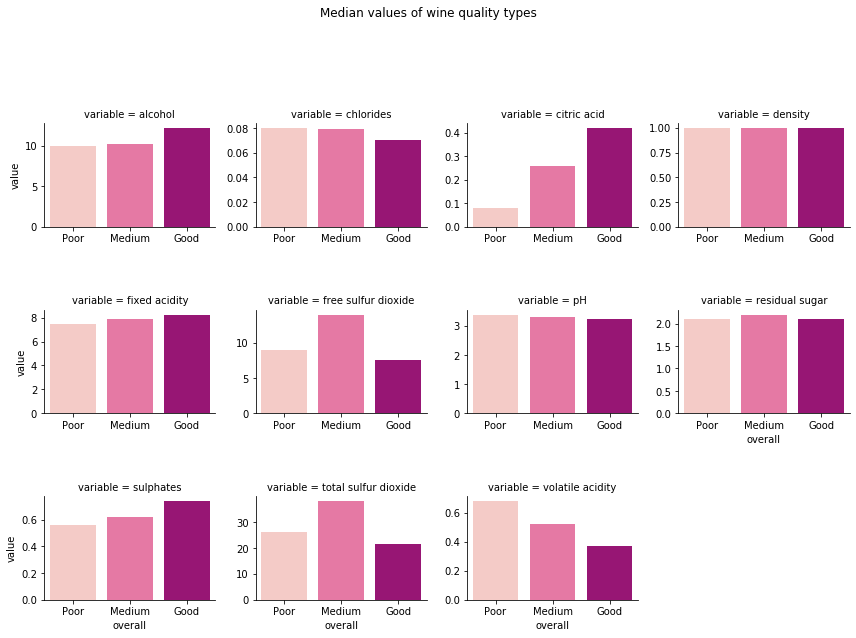

In [13]:
# Plot bar graph for the median values.

d = facet_grid_df.groupby(['variable','overall'], as_index=False)[['value']].median()

g = sns.FacetGrid(d, col='variable', col_wrap=4, sharey=False, sharex=False, height=3, aspect=1, legend_out=True, 
                  hue='overall', hue_order=['Poor','Medium','Good'],palette='RdPu')
g.map(sns.barplot, 'overall', 'value', order=['Poor','Medium','Good'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Median values of wine quality types')
plt.show()

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,overall
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [16]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
data['fixed acidity'].nunique()

96

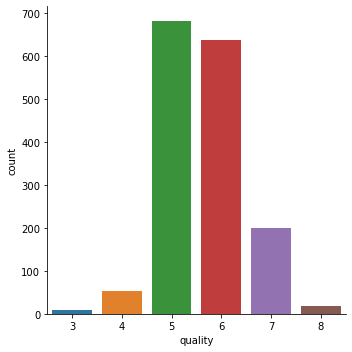

In [18]:
sns.catplot(x="quality",data=data,kind="count")

In [19]:
for col in data.columns.values:
    print("number of unique values of {}: {}".format(col,data[col].nunique()))

number of unique values of fixed acidity: 96
number of unique values of volatile acidity: 143
number of unique values of citric acid: 80
number of unique values of residual sugar: 91
number of unique values of chlorides: 153
number of unique values of free sulfur dioxide: 60
number of unique values of total sulfur dioxide: 144
number of unique values of density: 436
number of unique values of pH: 89
number of unique values of sulphates: 96
number of unique values of alcohol: 65
number of unique values of quality: 6


In [20]:
#correlation with target value
data.corr()[['quality']]

,quality
fixed acidity,0.124052
volatile acidity,-0.390558
citric acid,0.226373
residual sugar,0.013732
chlorides,-0.128907
free sulfur dioxide,-0.050656
total sulfur dioxide,-0.185100
density,-0.174919
pH,-0.057731
sulphates,0.251397


In [21]:
data.corr()[['quality']].sort_values(by='quality', ascending = False)

# alcohol, density, volatile acidity, chlorides influence the quality of wine in the order. 

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


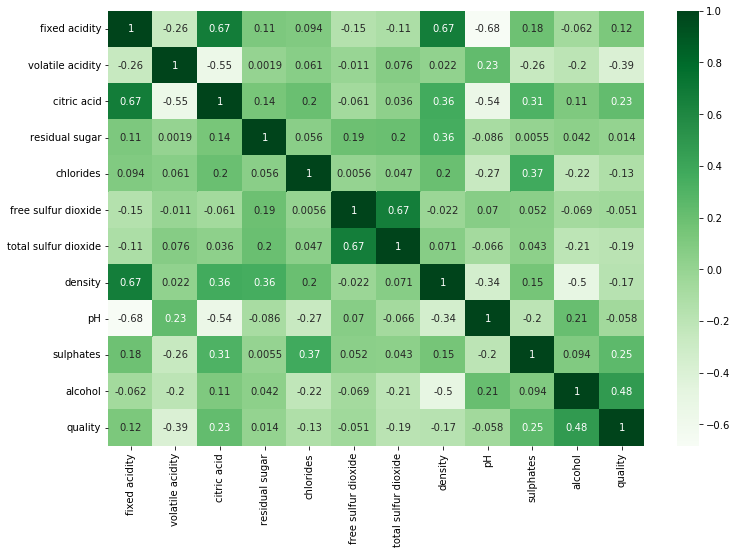

In [22]:
##performance analysis with graphical approach
plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), cmap='Greens', annot=True)
plt.show()

In [23]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

C:\Users\sunny\.conda\envs\demo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sunny\.conda\envs\demo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sunny\.conda\envs\demo\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


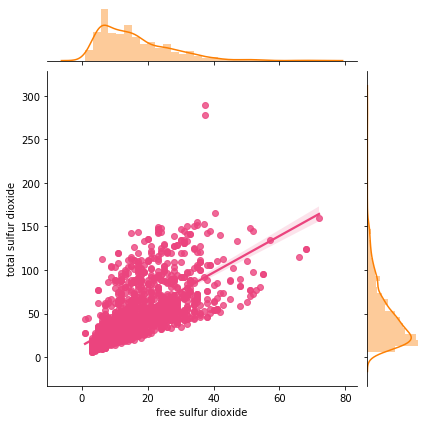

In [24]:
# Plot JointPlot
# free sulfur dioxide ~ total sulfur dioxide

g = sns.JointGrid(x='free sulfur dioxide', y='total sulfur dioxide', data=data)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

In [25]:
for col in data.columns:
    print(type(data[col]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


C:\Users\sunny\.conda\envs\demo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


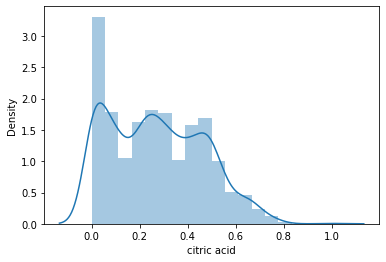

In [26]:
sns.distplot(data["citric acid"])

C:\Users\sunny\.conda\envs\demo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sunny\.conda\envs\demo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sunny\.conda\envs\demo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

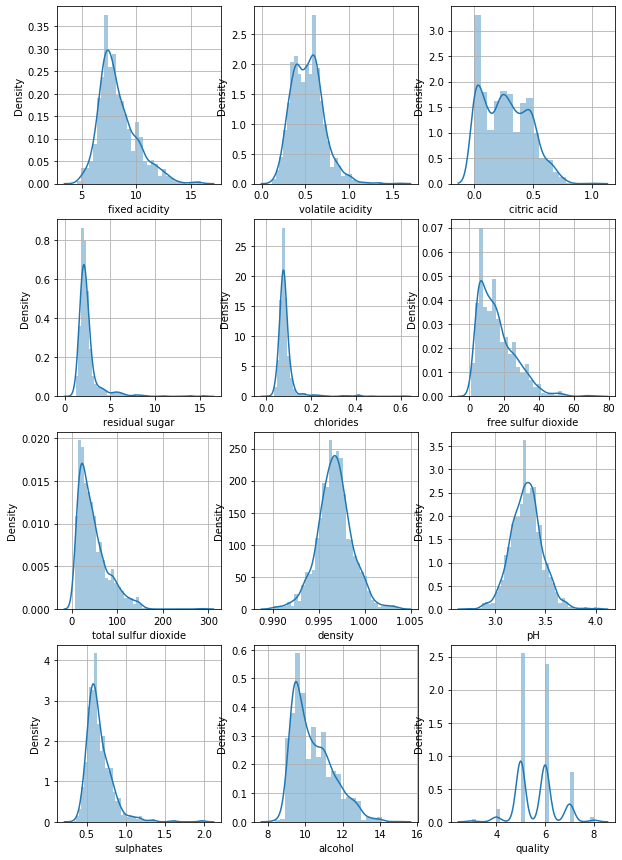

In [27]:
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(data[col])
    plt.grid()
    

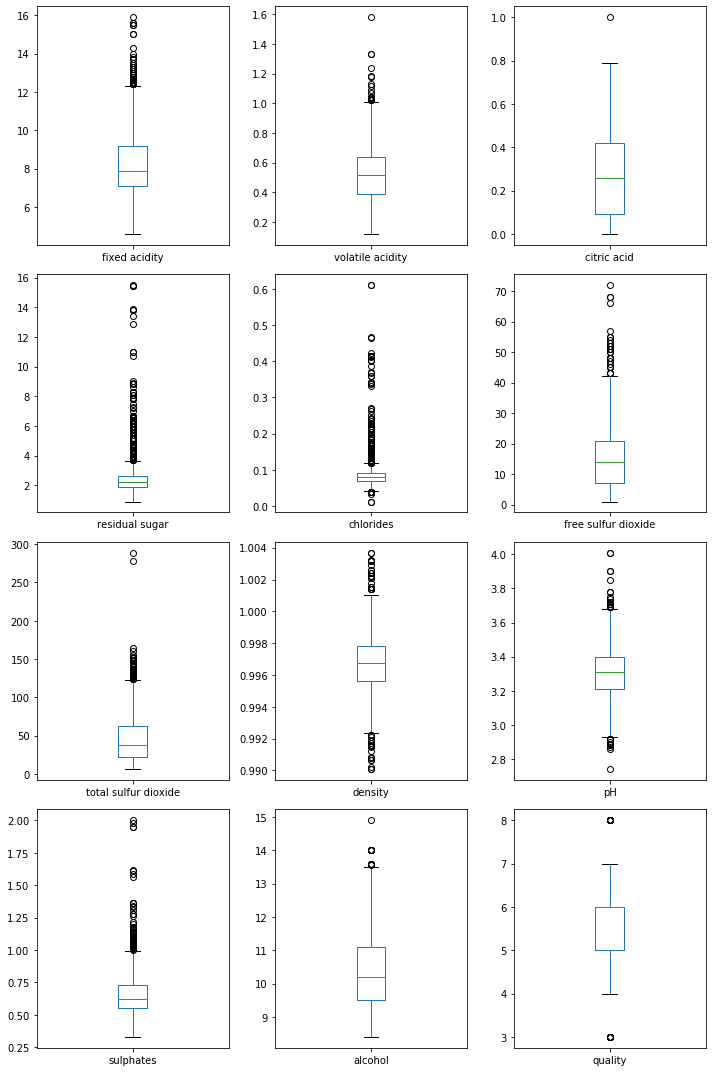

In [28]:
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns)):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [29]:
upper=data['fixed acidity'].mean() + 3* data['fixed acidity'].std()

In [30]:
upper

13.542926227678894

In [31]:
lower=data['fixed acidity'].mean() - 3* data['fixed acidity'].std()

In [32]:
lower

3.0963483189127237

In [33]:
data['fixed acidity']<upper

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Name: fixed acidity, Length: 1599, dtype: bool

In [34]:
data['fixed acidity']>lower

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Name: fixed acidity, Length: 1599, dtype: bool

In [36]:
data[(data['fixed acidity']<upper) &(data['fixed acidity']>lower)]["fixed acidity"]

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1587, dtype: float64

In [38]:
q = data['chlorides'].quantile(0.95)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['chlorides']<q]
q = data_cleaned['fixed acidity'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['fixed acidity']<q]
q = data_cleaned['residual sugar'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['residual sugar']<q]
q = data_cleaned['free sulfur dioxide'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['free sulfur dioxide']<q]
q = data_cleaned['density'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['density']<q]
q = data_cleaned['sulphates'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['sulphates']<q]


In [39]:
data_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


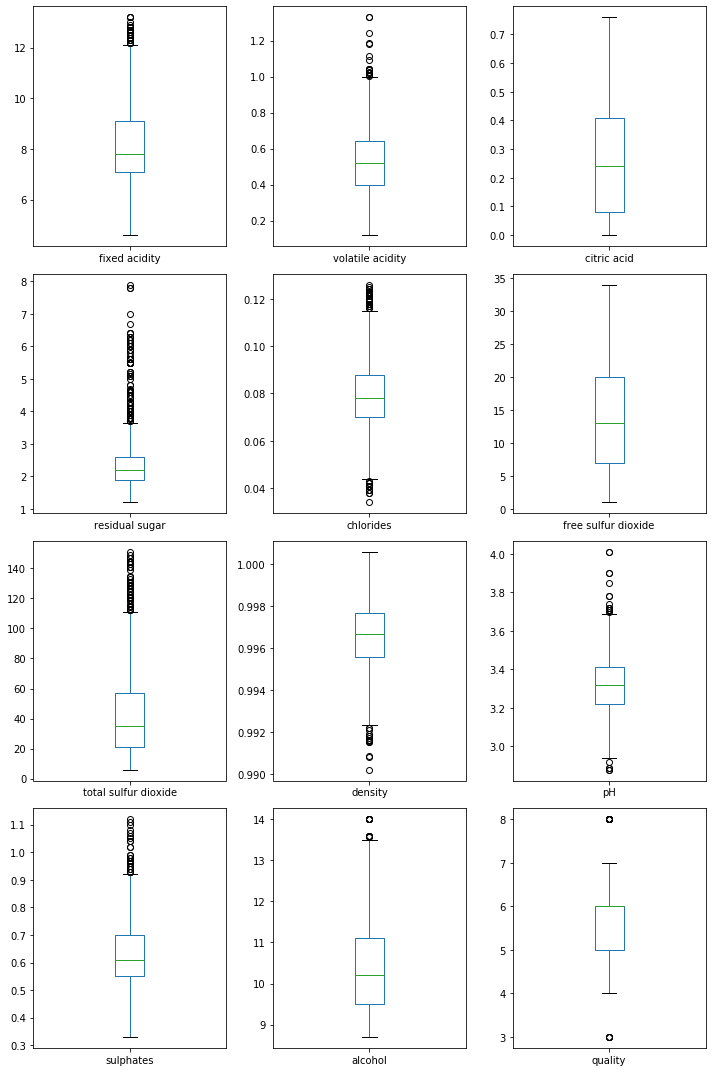

In [40]:
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data_cleaned.columns)):
    plt.subplot(4,3,i+1)
    data_cleaned.boxplot(col)
    plt.grid()
    plt.tight_layout()

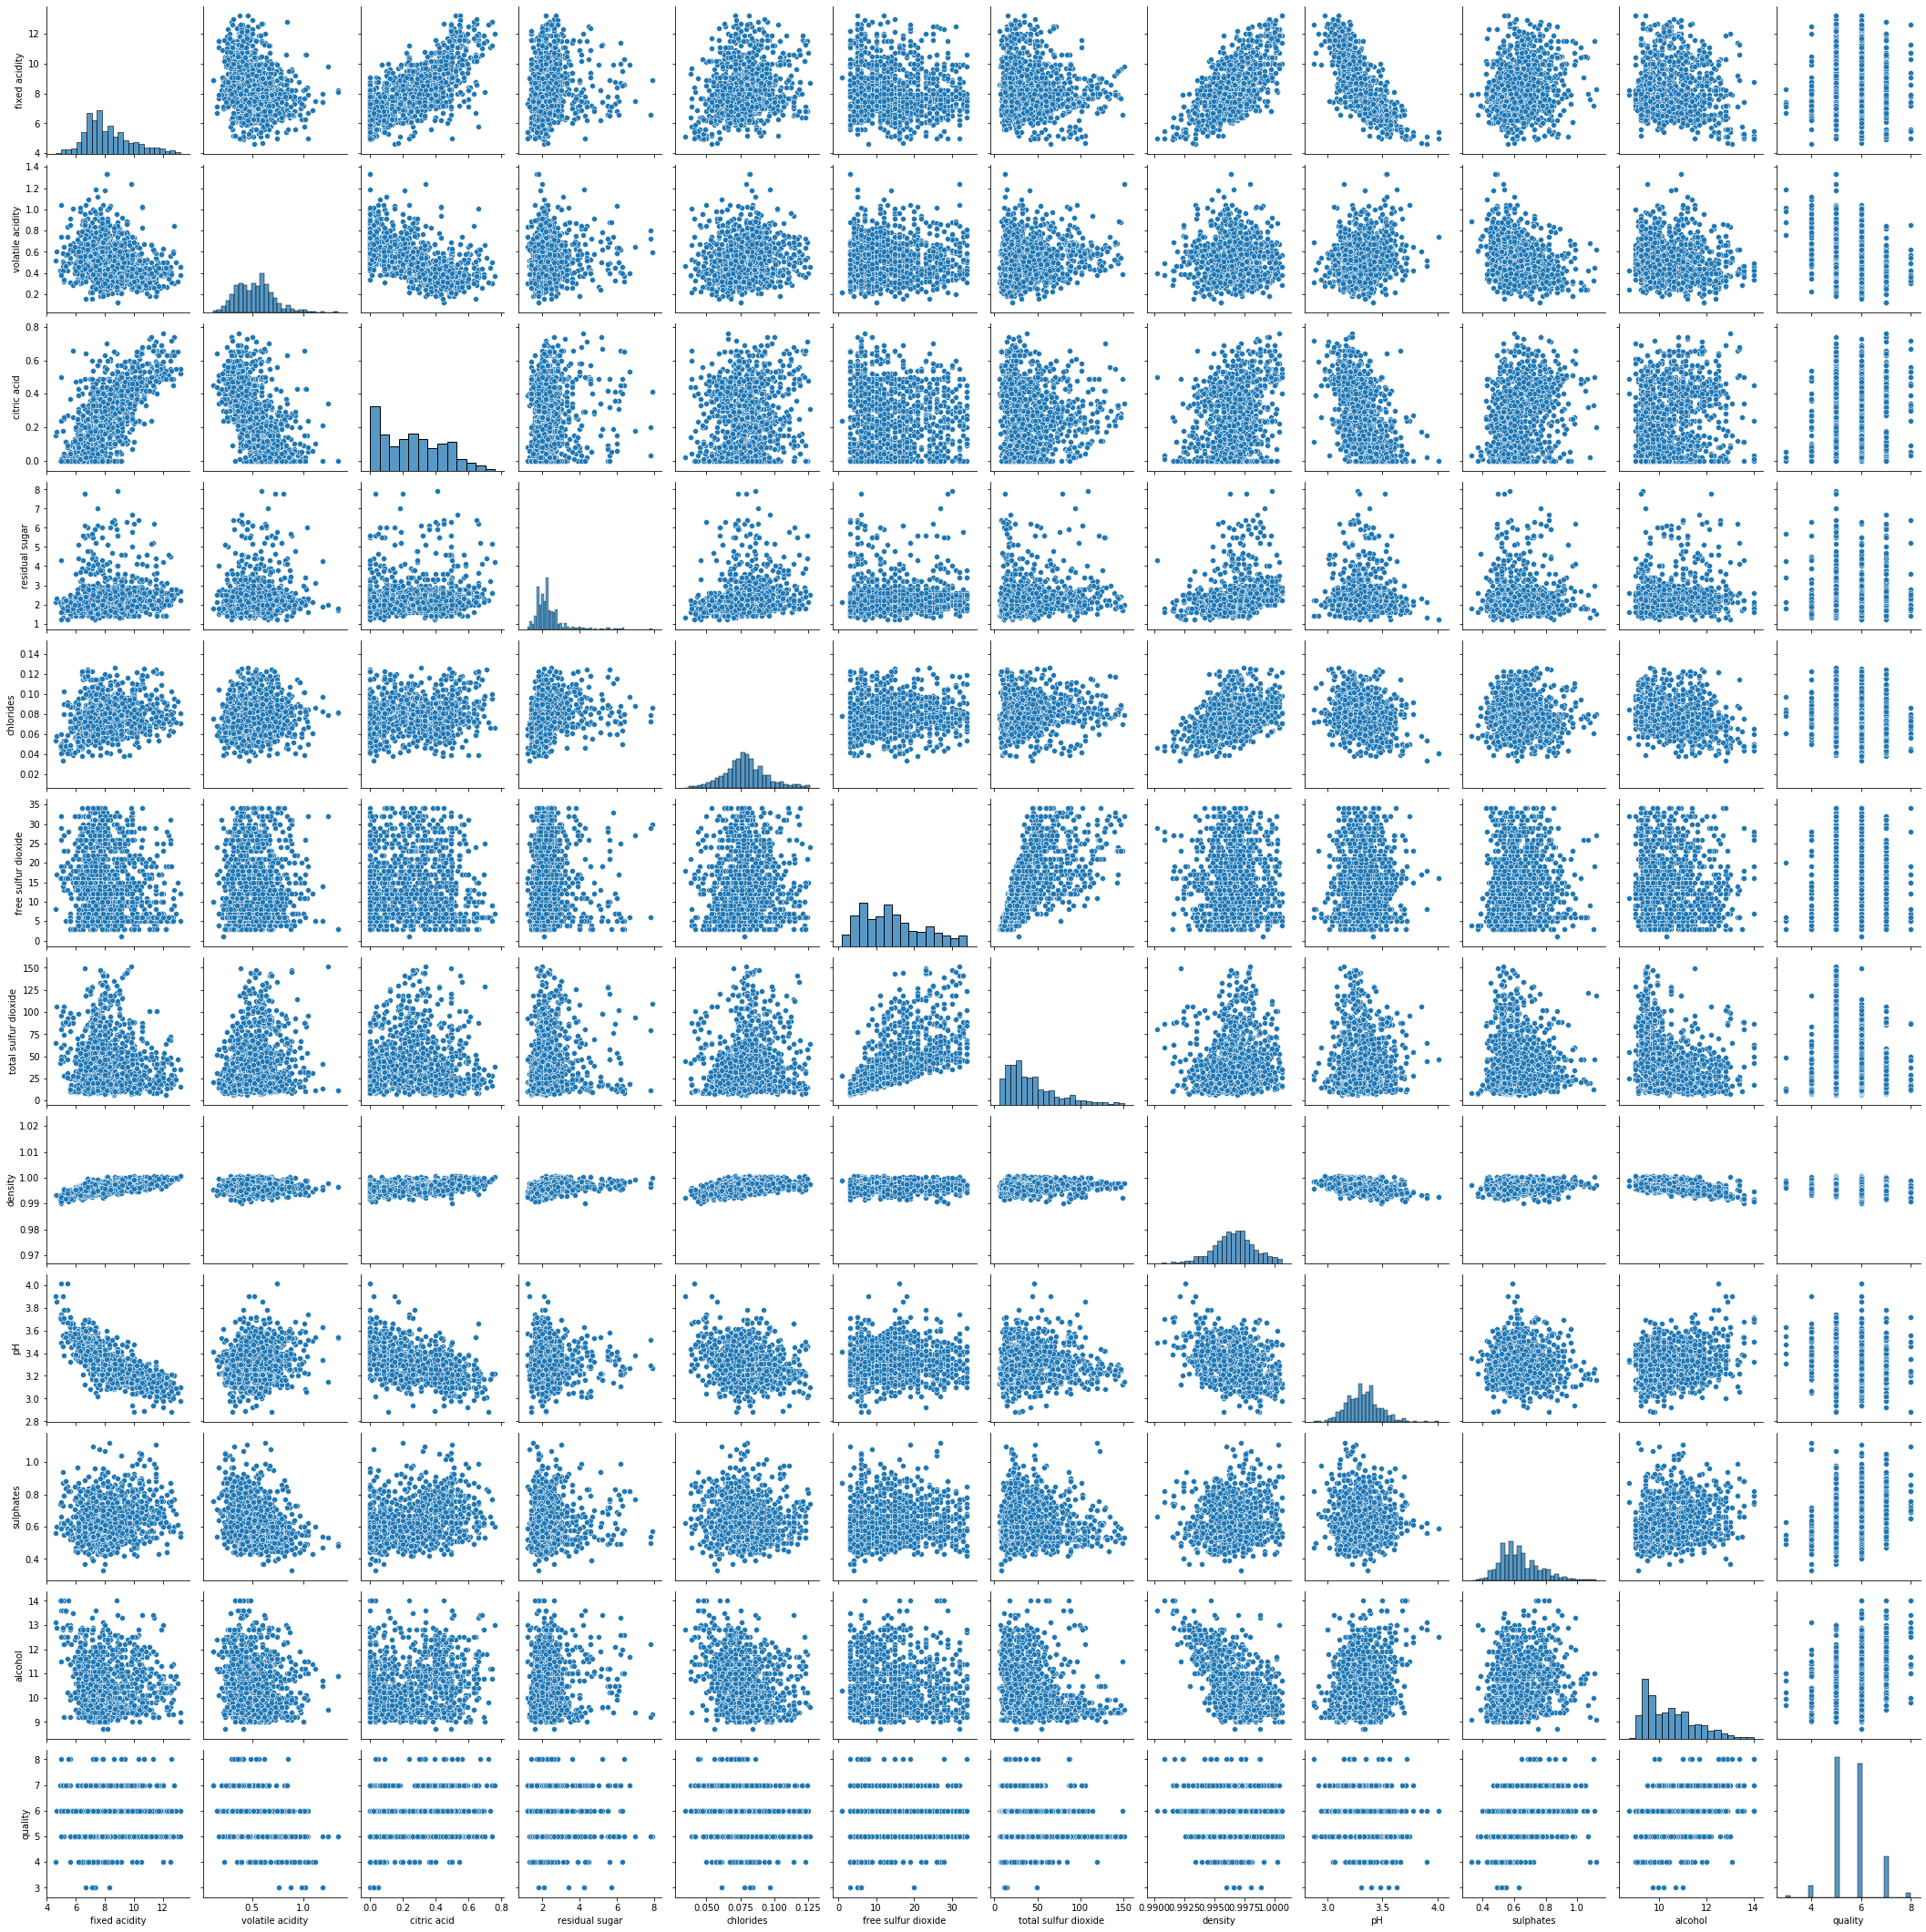

In [41]:
#plotting pair plot
sns.pairplot(data_cleaned)

In [42]:
X = data_cleaned.drop(columns = ['quality'])
y = data_cleaned['quality']

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [44]:
import pickle
pickle.dump(sc, open('standardScaler.sav','wb'))

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X_std,y,test_size = 0.30, random_state= 355)

In [46]:
###logistic regerssion

In [47]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0).fit(x_train,y_train)


C:\Users\sunny\.conda\envs\demo\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
y_pred=logreg.predict(x_test)

In [54]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']

In [55]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred, target_names= target_names)

'              precision    recall  f1-score   support\n\n     class 0       0.00      0.00      0.00         4\n     class 1       0.00      0.00      0.00        15\n     class 2       0.60      0.78      0.68       163\n     class 3       0.57      0.56      0.57       174\n     class 4       0.62      0.34      0.44        53\n     class 5       0.00      0.00      0.00         4\n\n    accuracy                           0.59       413\n   macro avg       0.30      0.28      0.28       413\nweighted avg       0.56      0.59      0.56       413\n'

In [59]:
with open('logistic_regression.sav', 'wb') as f:
    pickle.dump(logreg,f)

In [60]:
###support vector classifier/machine

In [62]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_pred=svc.predict(x_test)

In [64]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

C:\Users\sunny\.conda\envs\demo\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         4\n           4       0.00      0.00      0.00        15\n           5       0.62      0.82      0.70       163\n           6       0.62      0.60      0.61       174\n           7       0.63      0.36      0.46        53\n           8       0.00      0.00      0.00         4\n\n    accuracy                           0.62       413\n   macro avg       0.31      0.30      0.29       413\nweighted avg       0.59      0.62      0.59       413\n'

In [65]:
with open('support_vector_classifier.sav', 'wb') as f:
    pickle.dump(svc,f)

In [66]:
### Decision Tree

In [67]:
#let's first visualize the tree on the data without doing any pre processing
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
y_pred= dt.predict(x_test)

In [72]:
# accuracy of our classification tree
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5980629539951574

In [73]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         4\n           4       0.14      0.07      0.09        15\n           5       0.65      0.74      0.69       163\n           6       0.61      0.59      0.60       174\n           7       0.50      0.43      0.46        53\n           8       0.00      0.00      0.00         4\n\n    accuracy                           0.60       413\n   macro avg       0.32      0.30      0.31       413\nweighted avg       0.58      0.60      0.59       413\n'

In [74]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [75]:
grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [76]:
grid_search.fit(x_train,y_train)

C:\Users\sunny\.conda\envs\demo\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [77]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 6, 'min_samples_split': 5, 'splitter': 'random'}


In [78]:
grid_search.best_score_

0.6106325561312608

In [79]:
dt2= DecisionTreeClassifier(criterion = 'gini', max_depth =9, min_samples_leaf= 4, min_samples_split= 6, splitter ='random')
dt2.fit(x_train,y_train)    

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [81]:
y_pred=dt2.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred)

0.5714285714285714

In [83]:
import pickle
with open('decision_tree.sav', 'wb') as f:
    pickle.dump(dt2,f)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
y_pred=rf.predict(x_test)

In [89]:
accuracy_score(y_test,y_pred)

0.5738498789346247

In [90]:
# let's save the model
import pickle

with open('randomforest.pkl', 'wb') as f:
    pickle.dump(rf,f)
    


In [91]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

C:\Users\sunny\.conda\envs\demo\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         4\n           4       0.00      0.00      0.00        15\n           5       0.61      0.82      0.70       163\n           6       0.53      0.59      0.56       174\n           7       0.00      0.00      0.00        53\n           8       0.00      0.00      0.00         4\n\n    accuracy                           0.57       413\n   macro avg       0.19      0.24      0.21       413\nweighted avg       0.47      0.57      0.51       413\n'